# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

Mean Squared Error: 3442.3436220144777
R-squared: 0.8642692302413972
Next 30 days predicted stock prices:
            Predicted_Close
2024-06-22      1064.093091
2024-06-23      1065.830044
2024-06-24      1067.568691
2024-06-25      1069.309030
2024-06-26      1071.051063
2024-06-27      1072.794789
2024-06-28      1074.540208
2024-06-29      1076.287320
2024-06-30      1078.036126
2024-07-01      1079.786625
2024-07-02      1081.538817
2024-07-03      1083.292702
2024-07-04      1085.048280
2024-07-05      1086.805552
2024-07-06      1088.564517
2024-07-07      1090.325175
2024-07-08      1092.087527
2024-07-09      1093.851571
2024-07-10      1095.617309
2024-07-11      1097.384741
2024-07-12      1099.153865
2024-07-13      1100.924683
2024-07-14      1102.697194
2024-07-15      1104.471399
2024-07-16      1106.247296
2024-07-17      1108.024887
2024-07-18      1109.804171
2024-07-19      1111.585149
2024-07-20      1113.367820
2024-07-21      1115.152184


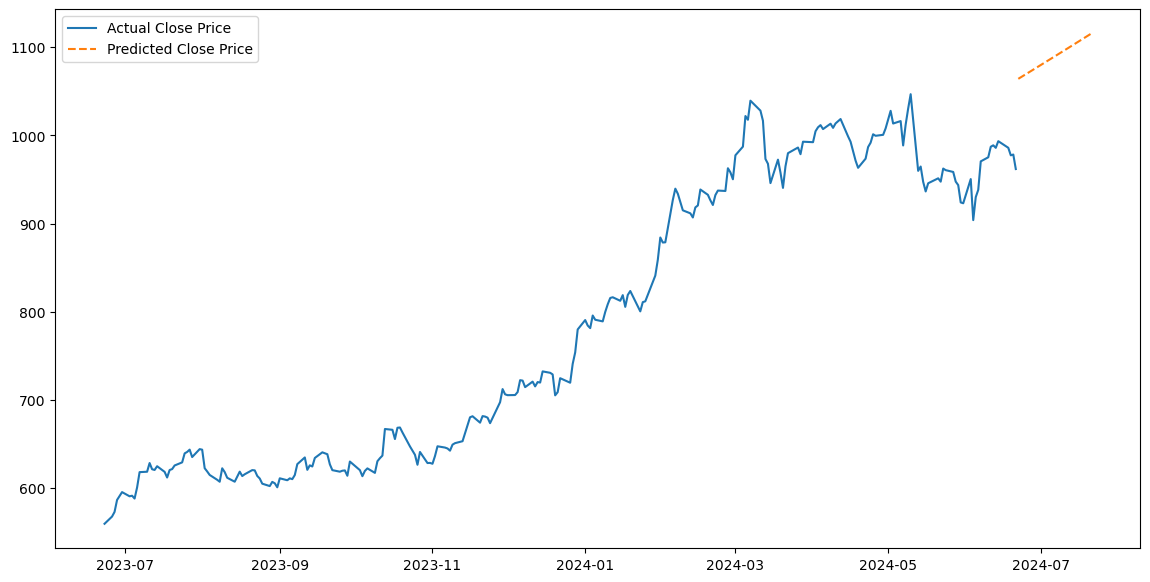

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
def load_data(csv_file):
    stock_data = pd.read_csv(csv_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data = stock_data[['Close']]
    stock_data = stock_data.dropna()
    return stock_data

# Prepare the dataset
def prepare_data(stock_data, degree=2):
    X = np.array(stock_data.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
    y = stock_data['Close'].values
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly, y, poly

# Train and evaluate the model
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    return model

# Make future predictions
def make_predictions(stock_data, model, poly, days=30):
    last_date = stock_data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_dates_poly = poly.transform(future_dates_ordinals)
    future_predictions = model.predict(future_dates_poly)
    future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])
    return future_data

# Plot the results
def plot_results(stock_data, future_data):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Actual Close Price')
    plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', linestyle='--')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    csv_file = "TATAMOTORS.NS.csv"  # Replace with your CSV file path
    stock_data = load_data(csv_file)
    X, y, poly = prepare_data(stock_data, degree=3)  # Change the degree as needed
    
    model = train_and_evaluate_model(X, y)
    future_data = make_predictions(stock_data, model, poly, days=30)
    
    # Print future predictions
    print("Next 30 days predicted stock prices:")
    print(future_data)
    
    plot_results(stock_data, future_data)
